<a href="https://colab.research.google.com/github/mayajsv/Machine_Learning/blob/main/Regress%C3%A3oLinear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import pylab as pl
from matplotlib import pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn. model_selection import train_test_split
from math import sqrt

## Download do Dataset

In [2]:
!pip3 install wget
!wget https://raw.githubusercontent.com/mayajsv/Machine_Learning/main/FuelConsumptionCo2.csv

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=e05917a5e95fd1b70a4a2ebb6874f759867eaeaf6955bf93ffdca9cac9064820
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget
--2021-10-24 14:16:12--  https://raw.githubusercontent.com/mayajsv/Machine_Learning/main/FuelConsumptionCo2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/plain]
Saving to: ‘FuelConsumptionCo2.csv’

FuelConsumptionCo2. 100%[===================>]  70.93K  --.-KB/s    in 0.007s  

2021-10-24 14:16:12 (10.2 MB/s) - ‘FuelConsumptionCo2.csv’ saved [72629/72629]



## Carregando o dataset para um Dataframe (Pandas)

In [8]:
# Criando uma dataset chamado "df" que receberá os dados em csv
df = pd.read_csv("FuelConsumptionCo2.csv")

# Apresentar a estrutura do Dataframe
print(df.head())


   MODELYEAR   MAKE  ... FUELCONSUMPTION_COMB_MPG CO2EMISSIONS
0       2014  ACURA  ...                       33          196
1       2014  ACURA  ...                       29          221
2       2014  ACURA  ...                       48          136
3       2014  ACURA  ...                       25          255
4       2014  ACURA  ...                       27          244

[5 rows x 13 columns]


In [9]:
# Analisando o tipo de dado que contém no DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


## Exibe a composição do Dataset

In [11]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


## Selecionar apenas as features que serão utilizadas

In [12]:
# Selecionar as features Motor e Co2
motores = df[['ENGINESIZE']]
co2 = df[['CO2EMISSIONS']]
print (motores.head())

   ENGINESIZE
0         2.0
1         2.4
2         1.5
3         3.5
4         3.5


## Dividir o dataset e dados de treinamento e dados de teste

In [14]:
motores_treino, motores_test, co2_treino, co2_test = train_test_split(motores, co2, test_size=0.2, random_state=42)
print(type(motores_treino))

<class 'pandas.core.frame.DataFrame'>


## Exibir a correlação entre as features do dataset de treinamento

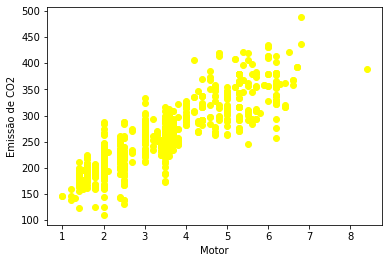

In [15]:
plt.scatter(motores_treino, co2_treino, color = 'yellow')
plt.xlabel("Motor")
plt.ylabel ("Emissão de CO2")
plt.show()

## Treinando o modelo de regressão linear

In [16]:
# Criando o modelo de tipo regressão linear
modelo = linear_model.LinearRegression()

# Treinando o modelo usando o dataset de treino
# Para encontrar o valor de A e B (Y = A + B.X)
modelo.fit(motores_treino, co2_treino)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Exibir os coeficientes (A e B)

In [17]:
print('(A) Intercepto: ', modelo.intercept_)
print('(B) Inclinação: ', modelo.coef_)

(A) Intercepto:  [126.28970217]
(B) Inclinação:  [[38.99297872]]


## Exibir a reta de regressão no dataset de treino

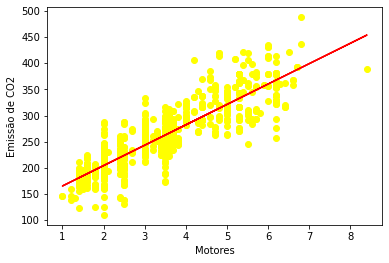

In [18]:
plt.scatter(motores_treino, co2_treino, color = 'yellow')
plt.plot(motores_treino, modelo.coef_[0][0] * motores_treino + modelo.intercept_[0], '-r')
plt.ylabel ('Emissão de CO2')
plt.xlabel ('Motores')
plt.show()

## Executando o modelo no dataset de teste


In [19]:
# Fazendo as predições usando o modelo e base de teste
predicoes_co2 = modelo.predict(motores_test)

## Exibindo a reta de regressão no dataset de teste

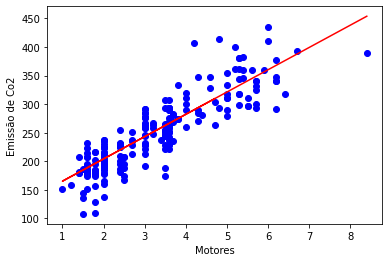

In [21]:
plt.scatter(motores_test, co2_test, color ='blue')
plt.plot(motores_test, modelo.coef_[0][0] * motores_test + modelo.intercept_[0], '-r')
plt.ylabel('Emissão de Co2')
plt.xlabel('Motores')
plt.show()


## Avaliando o modelo

In [43]:
print('Soma dos Erros ao Quadrado (SSE): %2.f' % np.sum((predicoes_co2 - co2_test)**2))
print('Erro Quadrático Médio (MSE): %.2f' % mean_squared_error(co2_test, predicoes_co2))
print('Erro Médio Absoluto (MAE): %.2f' % mean_absolute_error(co2_test, predicoes_co2))
print("Raiz do Erro Quadrático Médio (RMSE): %.2f " % sqrt(mean_squared_error(co2_test, predicoes_co2)))
print("R2-score: %.2f" % r2_score(predicoes_co2 , co2_test) )


Soma dos Erros ao Quadrado (SSE): 210991
Erro Quadrático Médio (MSE): 985.94
Erro Médio Absoluto (MAE): 24.10
Raiz do Erro Quadrático Médio (RMSE): 31.40 
R2-score: 0.68
